## 仿造 sklearn.model_selection 的 train_test_split() 函數實作自己的 train_test_split() 函數

In [1]:
import numpy as np

def train_split_data(X, y, test_size):
    # Shuffle ndarrays
    n_rows = y.size
    rand_order = np.random.choice(n_rows, size = n_rows, replace = False)
    X_shuffled = X[rand_order]
    y_shuffled = y[rand_order]
    
    # Split threshold
    split_point = int(np.ceil(n_rows * test_size))
    X_test = X_shuffled[:split_point]
    y_test = y_shuffled[:split_point]
    X_train = X_shuffled[split_point:]
    y_train = y_shuffled[split_point:]
    return X_train, y_train, X_test, y_test

## 載入 boston 資料，切分為訓練和測試資料

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print X_train.shape
print X_test.shape

(354, 13)
(152, 13)


## 利用 LSTAT 來預測 MEDV，使用 sklearn 建立線性迴歸模型

In [3]:
from sklearn.linear_model import LinearRegression

LSTAT = X_train[:, -1].reshape(-1, 1)
MEDV = y_train.reshape(-1, 1)
regr = LinearRegression()
regr.fit(LSTAT, MEDV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 畫出訓練資料散佈點與迴歸線

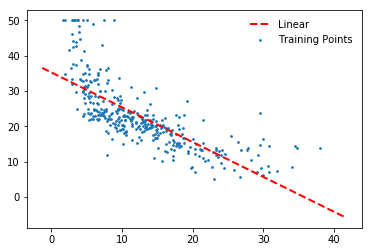

In [4]:
import matplotlib.pyplot as plt

X_fit = np.linspace(LSTAT.min() - 3, LSTAT.max()*1.1, 50).reshape(-1, 1)
y_lin_fit = regr.predict(X_fit)

# plotting
plt.scatter(LSTAT, MEDV, label = "Training Points", s = 3)
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "r", linewidth = 2)
plt.legend(loc = "upper right", frameon = False)
plt.show()

## 加入二次項與三次項建立迴歸模型，並將迴歸線加入圖中

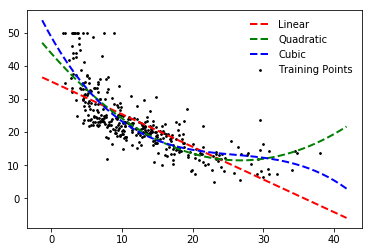

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
LSTAT_quad = quadratic.fit_transform(LSTAT)
LSTAT_cubic = cubic.fit_transform(LSTAT)

# quadratic fit
regr_q = LinearRegression()
regr_q = regr_q.fit(LSTAT_quad, MEDV)
y_quad_fit = regr_q.predict(quadratic.fit_transform(X_fit))

# cubic fit
regr_c = LinearRegression()
regr_c = regr_c.fit(LSTAT_cubic, MEDV)
y_cubic_fit = regr_c.predict(cubic.fit_transform(X_fit))

# plotting
plt.scatter(LSTAT, MEDV, label = "Training Points", s = 3, c = "k")
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "r", linewidth = 2)
plt.plot(X_fit, y_quad_fit, label = "Quadratic", linestyle = "--", c = "g", linewidth = 2)
plt.plot(X_fit, y_cubic_fit, label = "Cubic", linestyle = "--", c = "b", linewidth = 2)
plt.legend(loc = "upper right", frameon = False)
plt.show()

## 利用測試資料計算三個模型的 R2R2 與 RMSE

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# X_test
LSTAT_test = X_test[:, -1]
LSTAT_test = LSTAT_test.reshape(-1, 1)

# y_hats
y_lin_hat = regr.predict(LSTAT_test)
y_quad_hat = regr_q.predict(quadratic.fit_transform(LSTAT_test))
y_cubic_hat = regr_c.predict(cubic.fit_transform(LSTAT_test))

# rmse
rmse_lin = np.sqrt(mean_squared_error(y_test, y_lin_hat))
rmse_quad = np.sqrt(mean_squared_error(y_test, y_quad_hat))
rmse_cubic = np.sqrt(mean_squared_error(y_test, y_cubic_hat))

# r^2
r2_lin = r2_score(y_test, y_lin_hat)
r2_quad = r2_score(y_test, y_quad_hat)
r2_cubic = r2_score(y_test, y_cubic_hat)

labels = ["Linear", "Quadratic", "Cubic"]
r2s = [r2_lin, r2_quad, r2_cubic]
rmses = [rmse_lin, rmse_quad, rmse_cubic]

# Print out
for (label, r2, rmse) in zip(labels, r2s, rmses):
    print "[%s] R Squared: %.4f; RMSE: %.4f" % (label, r2, rmse)

[Linear] R Squared: 0.4887; RMSE: 6.1724
[Quadratic] R Squared: 0.5762; RMSE: 5.6196
[Cubic] R Squared: 0.6058; RMSE: 5.4194


## 練習將 https://storage.googleapis.com/py_ml_datasets/train.csv 中的 Sex 與 Embarked 由類別型變數轉換為 One-hot encoding 的 dummy variables

In [7]:
import pandas as pd

url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(url)
train_copied = train.loc[:, ["Sex", "Embarked"]]
train_copied = pd.get_dummies(train_copied)
train_copied.head()

Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0         1           0           0           1
1           1         0           1           0           0
2           1         0           0           0           1
3           1         0           0           0           1
4           0         1           0           0           1